#CSV file loading and sorting based on city

In [1]:
import pandas as pd


In [15]:
path = "/content/drive/MyDrive/airbnb_listings/Listings.csv"
listings=pd.read_csv(path, encoding='ISO-8859-1')
listings.head()

<ipython-input-15-eed3e18b4299>:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings=pd.read_csv(path, encoding='ISO-8859-1')


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [16]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [20]:
listings["host_since"]=pd.to_datetime(listings["host_since"])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [24]:
paris_listings=(listings
                .query("city=='Paris'")
                .loc[:,["host_since","neighbourhood","city","accommodates","price"]]
                )
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


As the missing row values are not that significant, we can ignore this figure in further analysis.


In [25]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


#Creating data frames


In [31]:
paris_listings_neighbourhood=(
    paris_listings
    .groupby("neighbourhood")
    .agg({"price":"mean"})
    .sort_values('price')
    )
paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [32]:
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [33]:
paris_listings_accommodations=(
    paris_listings
    .query("neighbourhood=='Elysee'")
    .groupby("accommodates")
    .agg({"price":"mean"})
    .sort_values('price')
    )
paris_listings_accommodations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [34]:
paris_listings_accommodations.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [37]:
paris_listings_over_time=(
    paris_listings
    .set_index("host_since")
    .resample('YE')
    .agg({"neighbourhood":"count","price":"mean"})
)
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


#Data Visualization

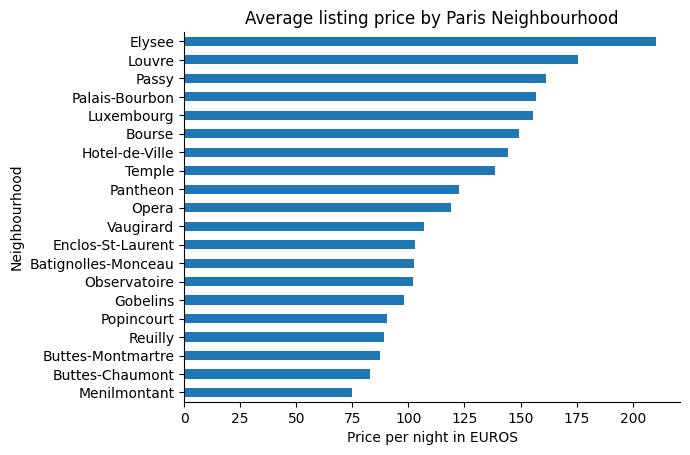

In [43]:
import seaborn as sns


(paris_listings_neighbourhood.plot
 .barh(
     title="Average listing price by Paris Neighbourhood",
     xlabel="Price per night in EUROS",
     ylabel="Neighbourhood",
     legend=None
 ))

sns.despine()

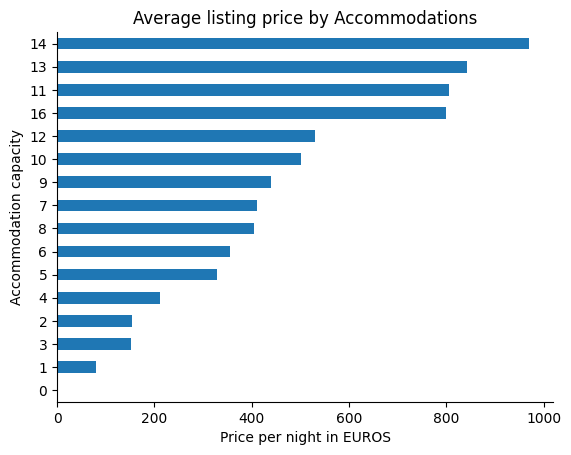

In [69]:

(paris_listings_accommodations.plot
 .barh(
     title="Average listing price by Accommodations",
     xlabel="Price per night in EUROS",
     ylabel="Accommodation capacity",
     legend=None
 ))

sns.despine()

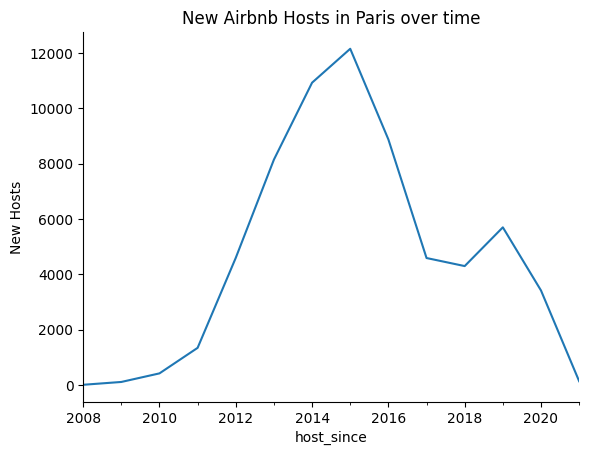

In [71]:
paris_listings_over_time['neighbourhood'].plot(
    ylabel = "New Hosts",
    title = "New Airbnb Hosts in Paris over time"
)

sns.despine()


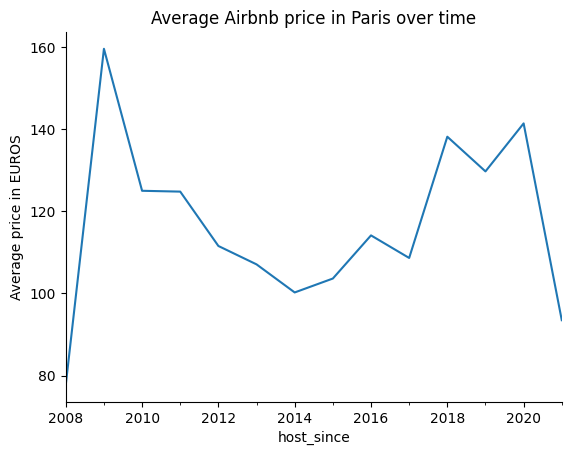

In [73]:
paris_listings_over_time['price'].plot(
    ylabel = "Average price in EUROS",
    title = "Average Airbnb price in Paris over time"
)

sns.despine()


Text(0.5, 1.0, '2015 regulations lead to fewer hosts and higher prices')

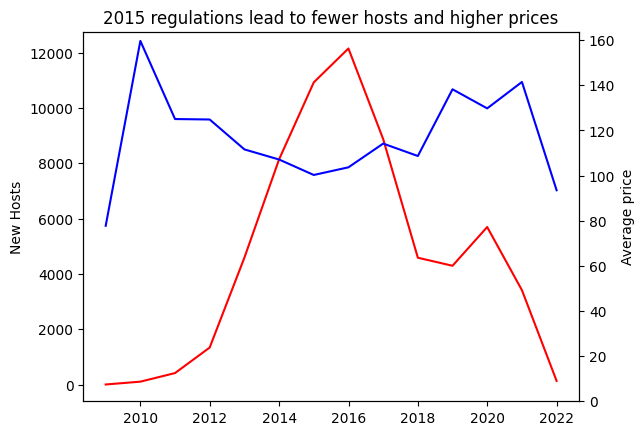

In [83]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['neighbourhood'],
    label='New Hosts',
    c ="red"
)

ax.set_ylabel("New Hosts")
ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['price'],
    label='Average price',
    c="blue"
)
ax2.set_ylim(0)

ax2.set_ylabel("Average price")
ax.set_title("2015 regulations lead to fewer hosts and higher prices")

